


Jupyter notebooks in Visual Studio Code does not use the active virtual environment
https://stackoverflow.com/questions/58119823/jupyter-notebooks-in-visual-studio-code-does-not-use-the-active-virtual-environm#:~:text=Under%20Extentions%20%2D%3E%20Python%20%2C%20you,using%20shortcut%20Ctrl%20%2B%20Shift%20%2B%20P


In [4]:
# libraries 

# step 1 
import requests as rq
# step 2 
import collections
# step 3 
from stop_words import get_stop_words
# step 4 
from wordcloud import WordCloud, STOPWORDS # wordcloud depends on numpy and pillow
import matplotlib.pyplot as plt 
# step 5 
import numpy as np
from PIL import Image 


# 1 get the whole page information from a wesite 
we use request library which bring us the html file of a URL 

In [11]:
#Bring the data from the target URL (html data)
website_html= rq.get('https://news.stanford.edu/2005/06/14/jobs-061505/').text 
#print(website_html)  # we can print our html to search the label with the text needed 

# 2 beatifulSoup to navigate throw the html and get the data 
we use bs4 beatifulsoup lib for navegate trow an lxml or html file, so we can read an specific label how if it was a dictionary 

https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [25]:
# beatifulsoup alows to navegate throw an HTML or lxml
soup = BeautifulSoup(website_url,'html.parser')

data = []
for p in soup.find_all("p"):
    data.append(p.text)
# print(data[3:-6]) # we can see the data and just chose the "p" with the speech 3 , -6.

# 3 clear data text 
we will analize the number of times a word appears in the jobs speech but there are a lot of words tht we must ignore, as the prepositions.
for this task we can do this handly but is easier using "from stop_words import get_stop_words" how bring us a list of common usless words in a specific lenguage. 

In [45]:
 # define the words to ignore in the analysis 
 stop_words_english = get_stop_words('en')
 # print(stop_words_english) # you can see the words

 stop_words = ["college", "years"] + stop_words_es #Adding aditional StopWords

# 4 plot a Word Clouds of the speech
What are the Word Clouds ?
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is. For this task, we will be using the python library called 'word_cloud' developed by Andreas Mueller. Here you can find the repository and learn more about it.

Installation notes
wordcloud depends on numpy and pillow.
To save the wordcloud into a file, matplotlib can also be installed. 

https://pypi.org/project/wordcloud/

In [46]:
# 4.1 initiate world cloud object
steve_wc = WordCloud(
    background_color='gray',
    max_words=2000,
    stopwords=stop_words
)
# 4.2 before feed the data we should convert: list > str
data = str(data) #Convert to string

# 4.3 generate the word cloud
steve_wc.generate(data)

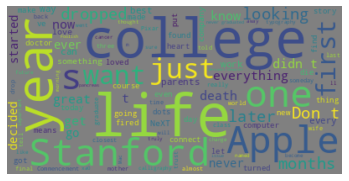

In [42]:
# 4.4 display the word cloud
plt.imshow(steve_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

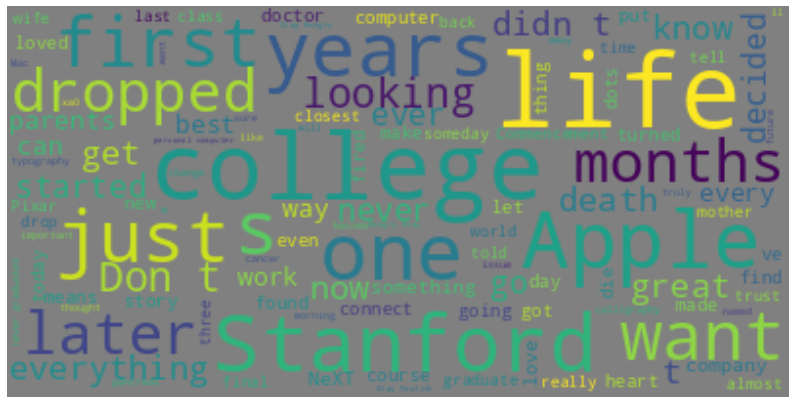

In [47]:
# re-generate the word cloud
steve_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(steve_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5 plot on a mask png 



In [ ]:
"""
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Apple_logo_black.svg/833px-Apple_logo_black.svg.png #OutMaskImage
# save mask to mx_mask
mx_mask = np.array(Image.open('test.png'))
    
print('Image downloaded and saved!')
"""


In [101]:
apple_mask = np.array(Image.open("./ad.png"))
print(apple_mask.shape)
apple_mask = (apple_mask - 255)
print(apple_mask[400,400])
print(apple_mask[300])


(1000, 1000)
0
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 14 29  9  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0

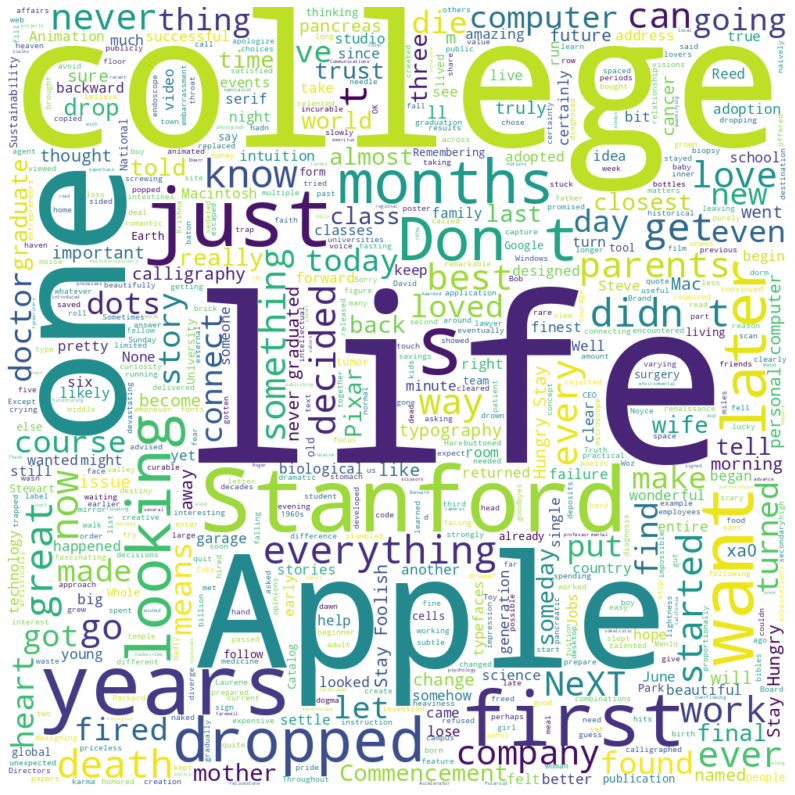

In [102]:
steve_wc = WordCloud(
    background_color='white',
    mask = apple_mask,
    max_words=2000,
    stopwords=stop_words,
)
# re-generate the word cloud
steve_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(steve_wc, interpolation='bilinear')
plt.axis('off')
plt.show()